<a href="https://colab.research.google.com/github/lukaskirchdorfer/dhbw-ai-foundations/blob/main/Neural_Network_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Training a Neural Network on image data

In this notebook, we will build and train a simple neural network using TensorFlow and Keras. We will use the MNIST dataset, which consists of handwritten digits, and train a neural network to classify these digits.


## 1. Import Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

## 3. Loading the Dataset (MNIST)
The MNIST dataset contains 28x28 grayscale images of handwritten digits (0-9) and their corresponding labels. We will load the dataset and split it into training and testing sets.

In [2]:
# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the images to values between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## 4. Visualizing the Dataset
Let's visualize some of the images from the MNIST dataset to understand what we're working with.

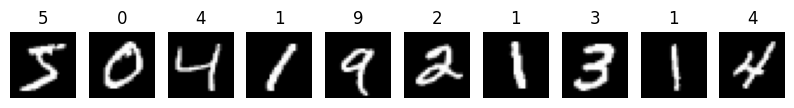

In [3]:
# Plot the first 10 images and their labels
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(train_labels[i])
    plt.axis('off')
plt.show()

## 5. Building the Neural Network Model
Now we'll build a simple feed-forward neural network using Keras. We'll use three layers:

An input layer that flattens the 28x28 image into a vector.
A hidden dense layer with 128 neurons and ReLU activation.
An output layer with 10 neurons (one for each digit) and softmax activation.

In [4]:
# Build the model
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Flatten the input
    layers.Dense(128, activation='relu'),  # Hidden layer
    layers.Dense(10, activation='softmax')  # Output layer
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## 6. Training the Model
We will train the model for 5 epochs. During training, the model will adjust its weights using backpropagation and gradient descent.

In [5]:
# Train the model
history = model.fit(train_images, train_labels, epochs=5, validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8651 - loss: 0.4594 - val_accuracy: 0.9630 - val_loss: 0.1267
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9614 - loss: 0.1315 - val_accuracy: 0.9713 - val_loss: 0.0958
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9747 - loss: 0.0875 - val_accuracy: 0.9753 - val_loss: 0.0816
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9806 - loss: 0.0659 - val_accuracy: 0.9752 - val_loss: 0.0869
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9865 - loss: 0.0467 - val_accuracy: 0.9782 - val_loss: 0.0746


## 7. Evaluating the Model
Once the model is trained, we will evaluate its performance on the test set.

In [6]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9717 - loss: 0.0910
Test Accuracy: 0.9764


## 8. Making Predictions
We can now use the trained model to make predictions on the test images.

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


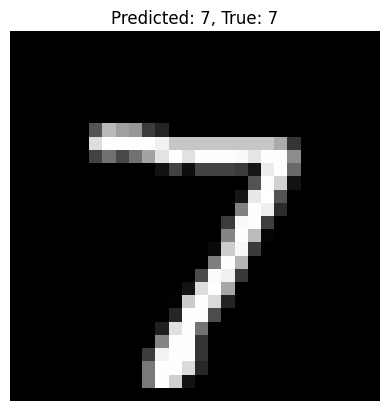

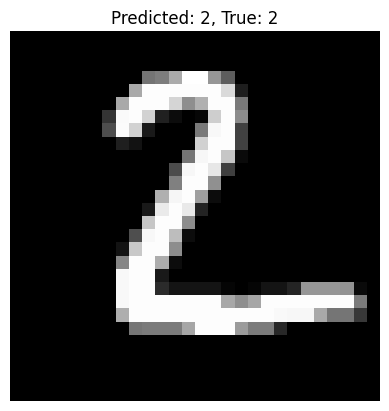

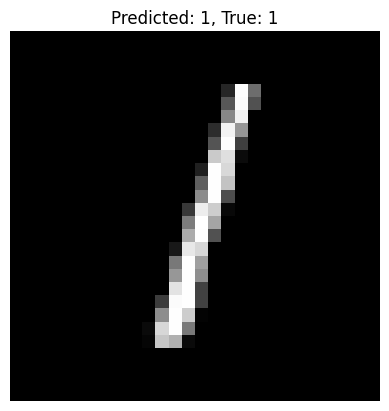

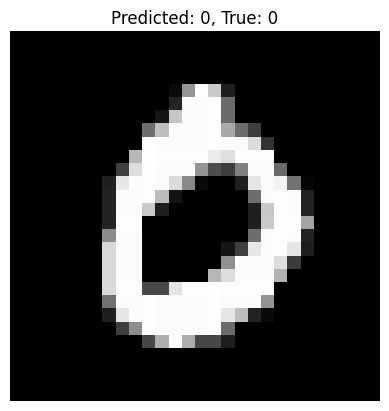

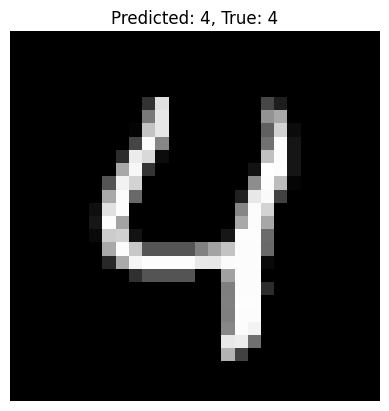

In [8]:
# Make predictions on the test images
predictions = model.predict(test_images)

# Show the first 5 test images, predicted labels, and true labels
for i in range(5):
  plt.imshow(test_images[i], cmap='gray')
  plt.title(f"Predicted: {np.argmax(predictions[i])}, True: {test_labels[i]}")
  plt.axis('off')
  plt.show()


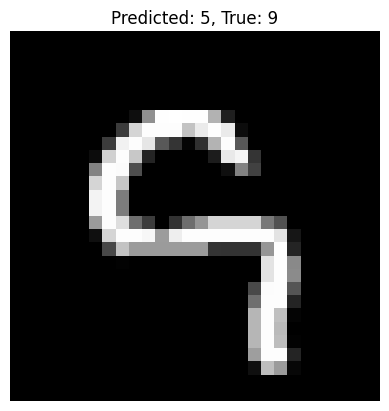

In [9]:
# Find an image where the prediction is wrong
incorrect_indices = np.where(np.argmax(predictions, axis=1) != test_labels)[0]
if incorrect_indices.size > 0:
  incorrect_index = incorrect_indices[0]  # Take the first incorrect prediction
  # Plot the image
  plt.imshow(test_images[incorrect_index], cmap='gray')
  plt.title(f"Predicted: {np.argmax(predictions[incorrect_index])}, True: {test_labels[incorrect_index]}")
  plt.axis('off')
  plt.show()
else:
  print("No incorrect predictions found.")


## 9. Plotting Training History
Let's visualize the training and validation accuracy and loss to understand how the model improved over time.

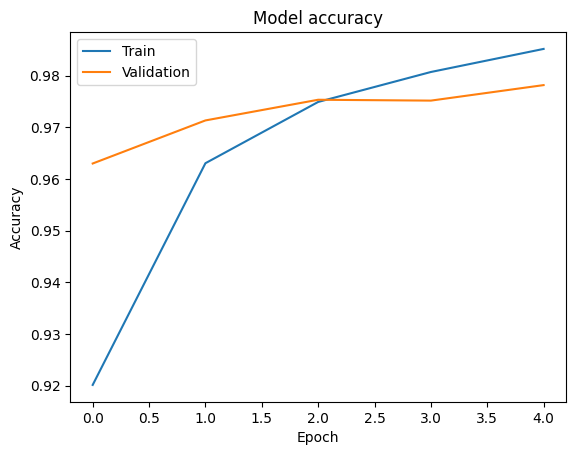

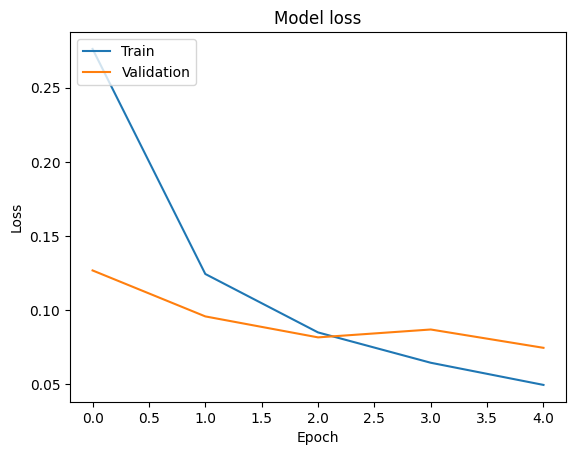

In [10]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


## 10. Conclusion
In this notebook, we built and trained a simple neural network using TensorFlow and Keras to classify handwritten digits from the MNIST dataset. We also evaluated the model's performance and visualized the training process. This is just the beginning of neural network training, and there are many ways to improve the model's performance, such as adding more layers, using different activation functions, and experimenting with various hyperparameters.

# Exercises

## Exercise 1:
Modify the neural network to include an additional hidden layer. Does it improve the accuracy?

In [ ]:
# your code here



## Exercise 2:
Train the network for more epochs and observe the changes in accuracy and loss over time.

In [ ]:
# your code here



## Exercise 3:
Experiment with different activation functions in the hidden layer (e.g., sigmoid, tanh) and observe the effects on training.

In [ ]:
# your code here

